# Ace Digital Pre-Screening Test - Question 1

## Question

1. A customer informed their consultant that they have developed several formulations of petrol 
that gives different characteristics of burning pattern. The formulations are obtaining by adding 
varying levels of additives that, for example, prevent engine knocking, gum prevention, stability 
in storage, and etc. However, a third party certification organisation would like to verify if the 
formulations are significantly different, and request for both physical and statistical proof. Since 
the formulations are confidential information, they are not named in the dataset. 
Please assist the consultant in the area of statistical analysis by doing this.

    a. A descriptive analysis of the additives (columns named as “a” to “i”), which must include 
summaries of findings (parametric/non-parametric). Correlation and ANOVA, if applicable, is 
a must.

    b. A graphical analysis of the additives, including a distribution study.

    c. A clustering test of your choice (unsupervised learning), to determine the distinctive number 
of formulations present in the dataset.

(refer attachment : ingredients.csv)

## Solution

The first step is to import all the necessary libraries for this solution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The next step is to read the attachched incgredients.csv file:

In [2]:
data = pd.read_csv("ingredient.csv")
data.head()

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


### Solution for Q1a

Question for reference:
> A descriptive analysis of the additives (columns named as “a” to “i”), which must include summaries of findings (parametric/non-parametric). Correlation and ANOVA, if applicable, is a must.

We can perform some basic descriptive analysis of the columns such as checking the datatypes, shape, and null values in the columns.

In [3]:
data.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [4]:
data.dtypes

a    float64
b    float64
c    float64
d    float64
e    float64
f    float64
g    float64
h    float64
i    float64
dtype: object

In [5]:
data.shape

(214, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       214 non-null    float64
 1   b       214 non-null    float64
 2   c       214 non-null    float64
 3   d       214 non-null    float64
 4   e       214 non-null    float64
 5   f       214 non-null    float64
 6   g       214 non-null    float64
 7   h       214 non-null    float64
 8   i       214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


In [7]:
data.isnull().sum()

a    0
b    0
c    0
d    0
e    0
f    0
g    0
h    0
i    0
dtype: int64

The simple descriptive analysis shows that all the columns are numerical and there are no missing values in any of the columns.

#### Finding correlation of features

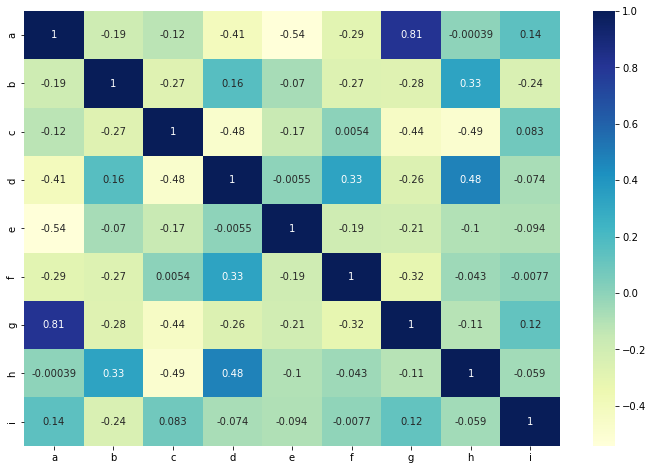

In [8]:
sns.heatmap(data.corr(),annot=True, cmap="YlGnBu")
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

From the heatmap we can see that features *a* and *g* have a high positive correlation, which means as feature A increases, so does feature B. The other features in the dataset seem to have little to no correlation with each other. A correlation that is near perfect means that features are highly dependent on each other. Having both features can be redundant and may cause a problem called multicollinearity for some models. We want each of our variables to be indepent of each other and reduce redundancy, therefore one of the features may be removed before training the machine learning model.

### ANOVA

In [9]:
data_melt = pd.melt(data.reset_index(), id_vars=['index'], value_vars=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i'])
# replace column names
data_melt.columns = ['index', 'additives', 'value']

import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(data['a'], data['b'], data['c'], data['d'], data['e'], data['f'], data['g'], data['h'], data['i'])
print('F value:',fvalue, ' p value:', pvalue)

# get ANOVA table
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ additives', data=data_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=data_melt, res_var='value', anova_model='value ~ additives')
res.anova_summary


F value: 168331.96885835085  p value: 0.0


,df,sum_sq,mean_sq,F,PR(>F)
additives,8.0,943261.084445,117907.635556,168331.968858,0.0
Residual,1917.0,1342.757047,0.700447,NaN,NaN


The F value is inversely related to the p value. A high F value indicates a signficant p value. The p value obtained from ANOVA analysis is significant as it is less than 0.05, which means there are significant differences among additives. 

### Solution for Q1b

Question for reference:
> A graphical analysis of the additives, including a distribution study.

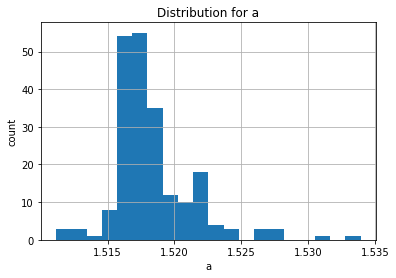

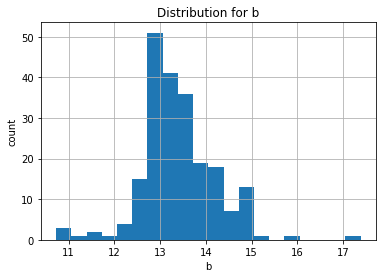

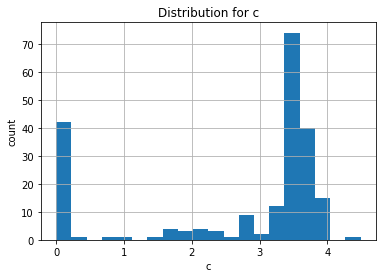

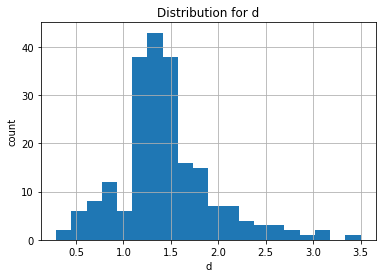

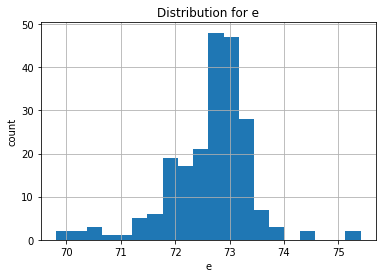

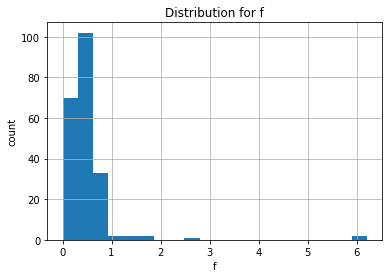

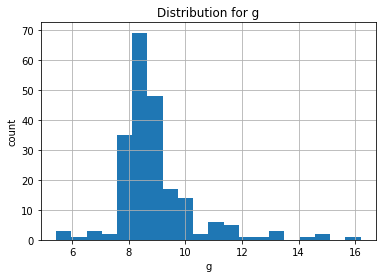

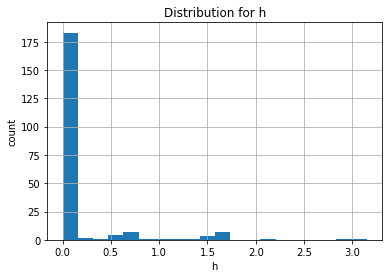

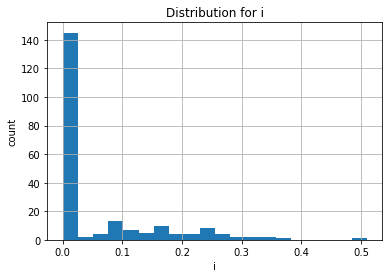

In [10]:
numerical_variables = [x for x in data.columns]


# Let's go ahead and analyse the distributions of these variables
def analyze_distribution(data, var):
    data = data.copy()
    data[var].hist(bins=20)
    plt.ylabel('count')
    plt.xlabel(var)
    plt.title("Distribution for " + str(var))
    plt.show()
    
for x in numerical_variables:
    analyze_distribution(data, x)

The distribution graph shows that features a, b, c, d, e, g are normally distributed. <br>
Features f, h, and i appear to be right-skewed.

Another graphical analysis that can be performed is a boxplot to see if there are outliers in the dataset. 

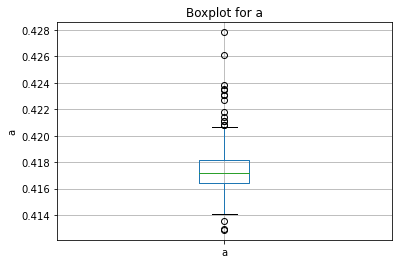

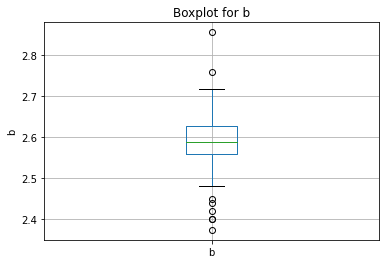

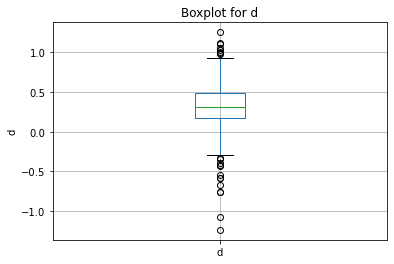

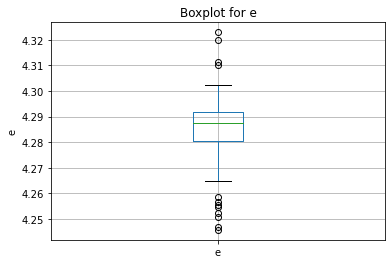

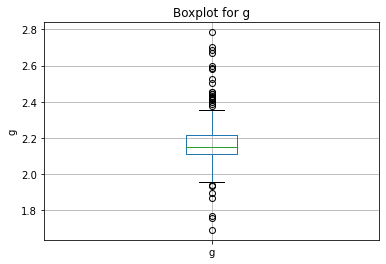

In [11]:
def draw_boxplot(data, var):
    data = data.copy()
    
    # log does not take negative values, so let's be careful and skip those variables
    if 0 in data[var].unique():
        pass
    else:
        data[var] = np.log(data[var])
        data.boxplot(column=var)
        plt.title('Boxplot for ' + str(var))
        plt.ylabel(var)
        plt.show()
    
for x in numerical_variables:
    draw_boxplot(data, x)

### Solution for Q1c

Question for reference: 
> A clustering test of your choice (unsupervised learning), to determine the distinctive number of formulations present in the dataset.

We will use K-means clustering algorithm to perform the cluster analysis. We first need to determine the appropriate number of clusters to use. This can be done by using the elbow method where by we will run several _k_-means and increment _k_ with each iteration.

C:\Users\Arishwin\Documents\JupyterProjects\ace_resource_test\env\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


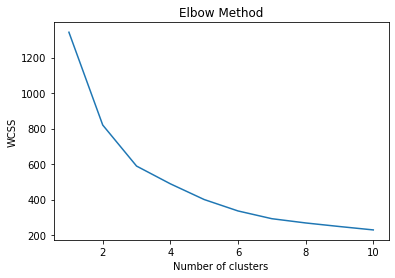

In [12]:
from sklearn.cluster import KMeans

X = data.copy()

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The optimal number of clusters to choose is when the curve starts to bend which is known as the *elbow point*. This point is a reasonable trade-off between error and number of clusters. In the graph above, the elbow is located at x=3, which means that <b>the optimal number of clusters should be 3.</b>

We will now fit the KMeans algorithm with 3 clusters.

In [13]:
# fitting the model
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_pred = kmeans.fit_predict(X)

In [14]:
y_pred

array([1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       0, 1, 2, 2, 1, 0, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1,
       1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [15]:
# saving the predictions onto the dataframe
data['predictions'] = pd.DataFrame(y_pred)
data.head()

,a,b,c,d,e,f,g,h,i,predictions
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07,1
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00,1
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00,1


In [16]:
# seeing number of additives in each cluster
data["predictions"].value_counts()

1    162
0     31
2     21
Name: predictions, dtype: int64

We should visualize the clusters to give a better idea on how these ingredients are grouped together.

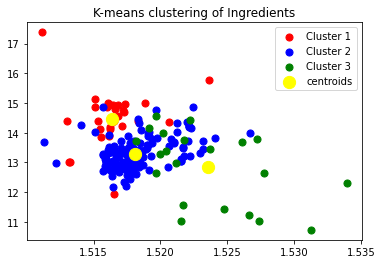

In [17]:
plt.figure(2)
plt.scatter(X.iloc[y_pred == 0, 0], X.iloc[y_pred == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X.iloc[y_pred == 1, 0], X.iloc[y_pred == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X.iloc[y_pred == 2, 0], X.iloc[y_pred == 2, 1], s = 50, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'yellow', label = 'centroids' )
plt.title("K-means clustering of Ingredients")

plt.legend()
plt.show()